BBC articles EDA & Data Visualization

In [3]:
from google.colab import files
uploaded = files.upload()

Saving bbc_news.zip to bbc_news.zip


In [4]:
import zipfile
import os


with zipfile.ZipFile('bbc_news.zip', 'r') as zip_ref:
    zip_ref.extractall('bbc_news')

In [5]:
import os
import pandas as pd

data = []

root_path = 'bbc_news/bbc_news'

for category in os.listdir(root_path):
    category_path = os.path.join(root_path, category)
    if os.path.isdir(category_path):
        for file in os.listdir(category_path):
            if file.endswith('.txt'):
                file_path = os.path.join(category_path, file)
                with open(file_path, 'r', encoding='latin-1') as f:
                    content = f.read().strip()
                    data.append((content, category))

df = pd.DataFrame(data, columns=['text', 'category'])

print(f"✅ Loaded {len(df)} documents.")
df.head()

✅ Loaded 2225 documents.


,text,category
0,Top judge clashes with ministers\n\nThe UK's t...,politics
1,Parties' plans for council tax\n\nAnger at cou...,politics
2,Clarke to press on with ID cards\n\nNew Home S...,politics
3,Guantanamo four free in weeks\n\nAll four Brit...,politics
4,'UK will stand firm on EU rebate'\n\nBritain's...,politics


Dataset Inspection

In [6]:
print(df.shape)
print(df['category'].value_counts())
df['text'].str.len().describe()

(2225, 2)
category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64


,text
count,2225.000000
mean,2264.788764
std,1364.307123
min,502.000000
25%,1447.000000
50%,1966.000000
75%,2803.000000
max,25484.000000


In [7]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string

In [8]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

custom_stopwords = {'said', 'also', 'could', 'would', 'one', 'two', 'get', 'us', 'use', 'like','mr', 'year','years','new','people'}
stop_words.update(custom_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
def clean_text(text):
    if isinstance(text, str):  # Make sure the text is a string
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        words = text.split()
        words = [word for word in words if word not in stop_words]
        return ' '.join(words)
    else:
        return ''

df['cleaned_text'] = df['text'].apply(clean_text)

all_text = ' '.join(df['cleaned_text'])

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_text)

#EDA 1. Distribution of Categories (Bar Chart)

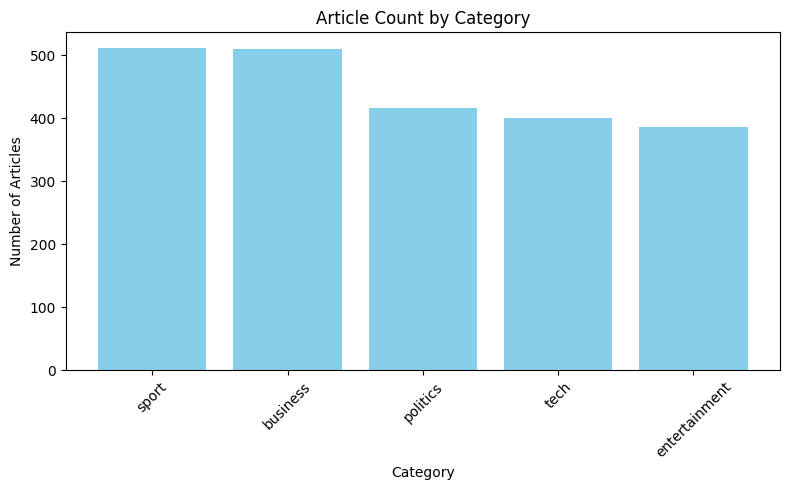

In [11]:
import matplotlib.pyplot as plt

category_counts = df['category'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.title("Article Count by Category")
plt.xlabel("Category")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#EDA 2.Distribution of Text Length

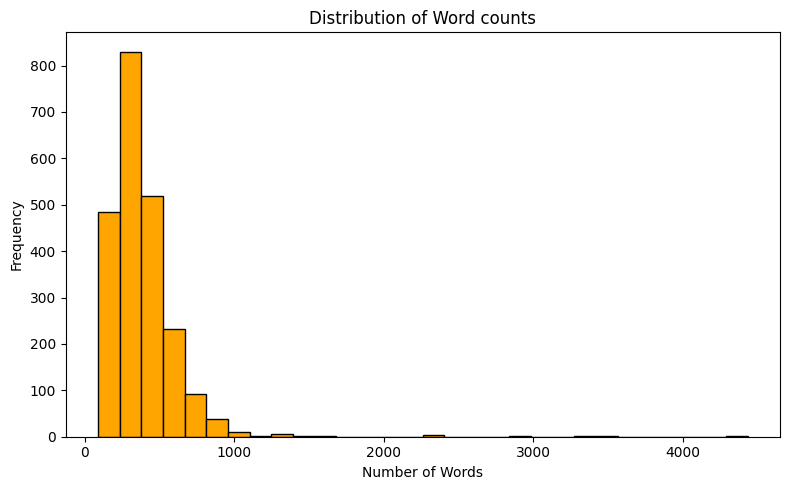

In [14]:
df['text_length'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
plt.hist(df['text_length'], bins=30, color='orange', edgecolor='black')
plt.title("Distribution of Word counts")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#EDA with Seaborn

In [ ]:
import seaborn as sns
sns.set(style='whitegrid')

<ipython-input-52-786bf83e1e9a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='category', palette='Set2', order=df['category'].value_counts().index)


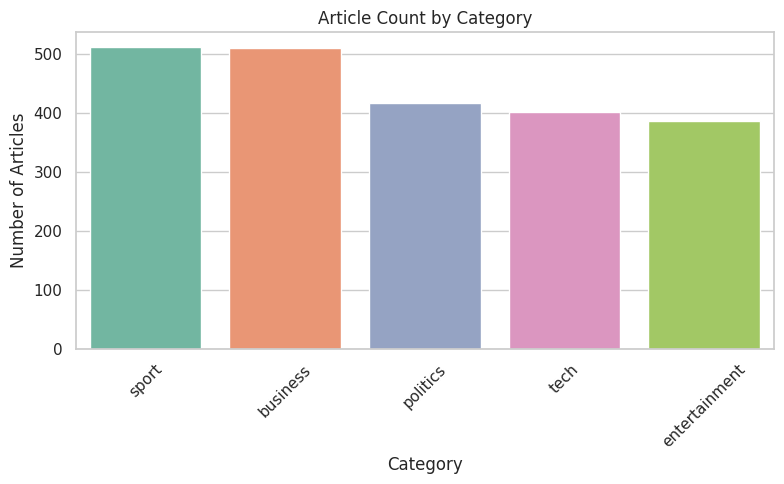

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='category', palette='Set2', order=df['category'].value_counts().index)
plt.title("Article Count by Category")
plt.xlabel("Category")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#EDA Boxplot of Text Length per Category

<ipython-input-66-94519024b1bc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='category', y='text_length', palette='Set3')


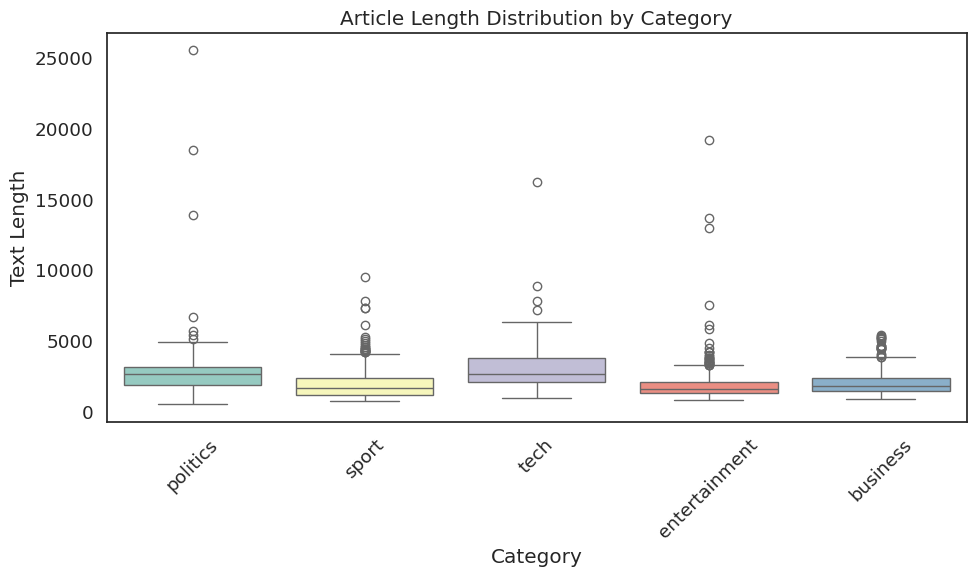

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='text_length', palette='Set3')
plt.title("Article Length Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Text Length")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#EDA: Word Count Column (for extra insights)

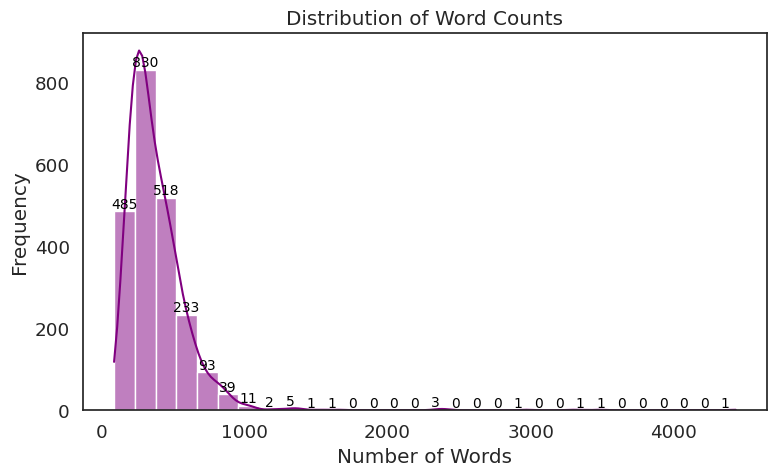

In [ ]:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
ax = sns.histplot(df['word_count'], bins=30, kde=True, color='purple')

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = height
    ax.text(x, y + 0.1, f'{int(height)}', ha='center', va='bottom', fontsize=10, color='black')

plt.title("Distribution of Word Counts")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#TOP 15 most frequent words per each Category

<ipython-input-68-55acc77ea4e1>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(words, rotation=45)
<ipython-input-68-55acc77ea4e1>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(words, rotation=45)
<ipython-input-68-55acc77ea4e1>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(words, rotation=45)
<ipython-input-68-55acc77ea4e1>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(words, rotation=45)
<ipython-input-68-55acc77ea4e1>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocat

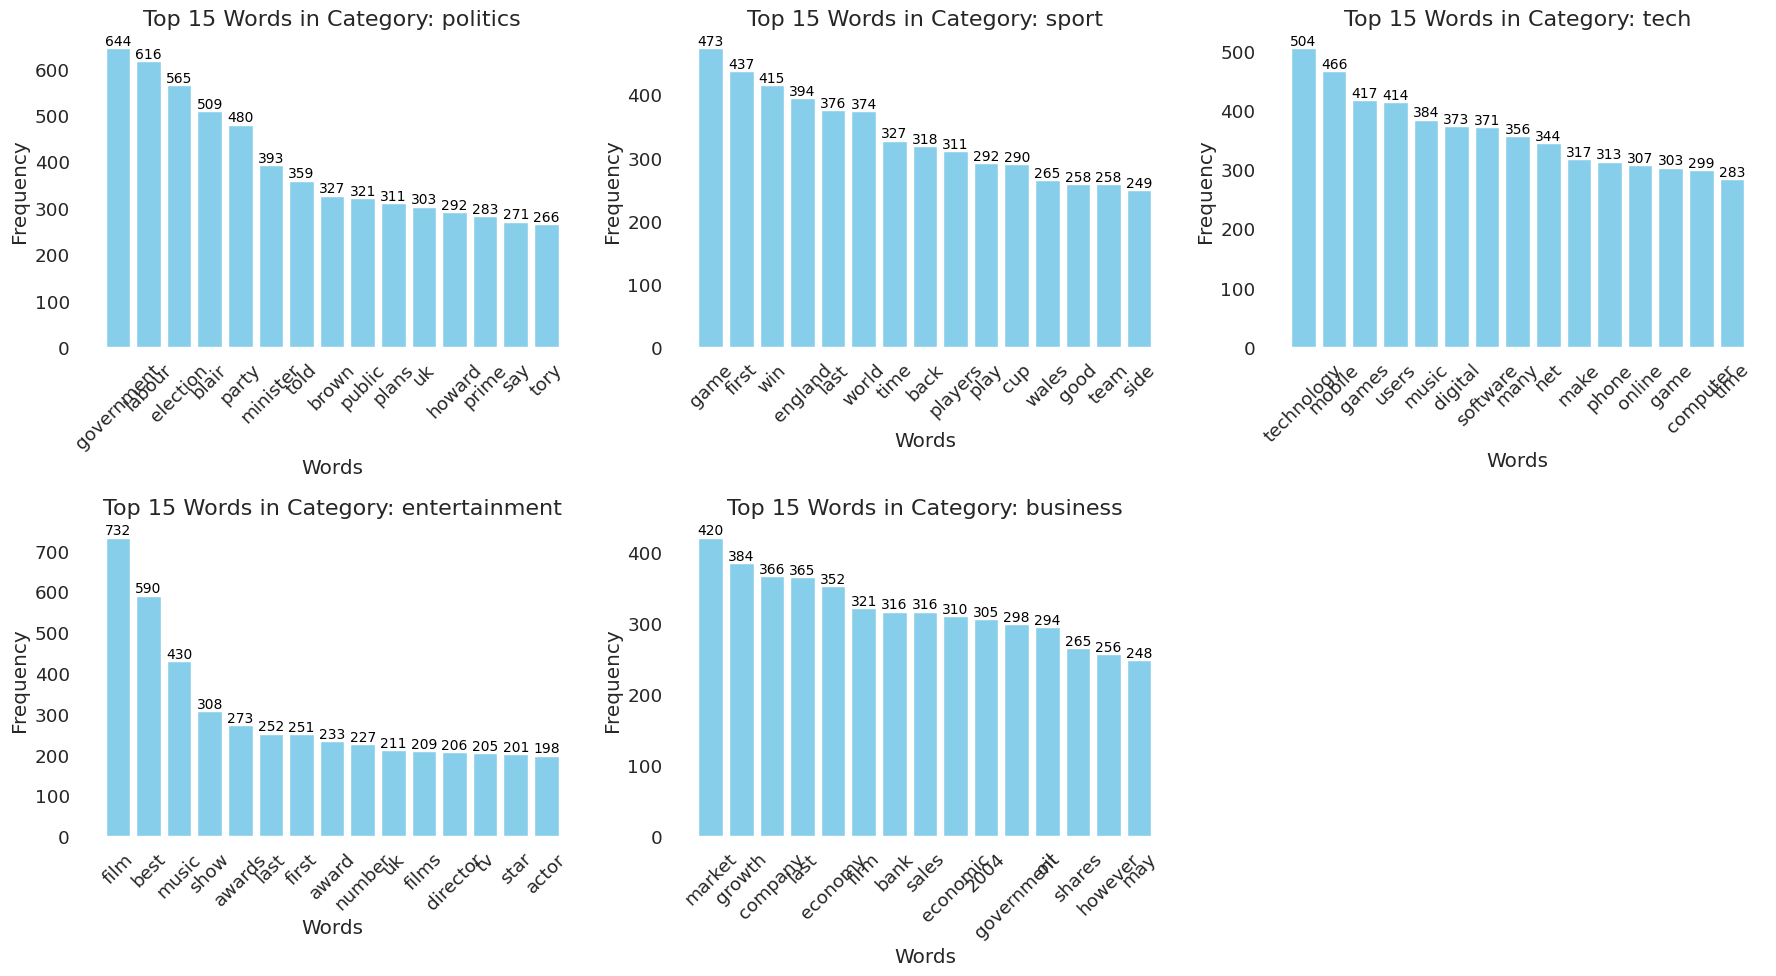

In [ ]:
top_n = 15

def get_top_words(texts, n=top_n):
    all_words = ' '.join(texts).split()
    return Counter(all_words).most_common(n)

categories = df['category'].unique()


fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # Flatten to easily iterate over

for i, cat in enumerate(categories):
    subset = df[df['category'] == cat]
    top_words = get_top_words(subset['cleaned_text'])

    words, counts = zip(*top_words)

    bars = axes[i].bar(words, counts, color='skyblue')

    for bar in bars:
        yval = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=10, color='black')

    axes[i].set_title(f"Top {top_n} Words in Category: {cat}", fontsize=16)
    axes[i].set_xticklabels(words, rotation=45)
    axes[i].set_xlabel("Words")
    axes[i].set_ylabel("Frequency")

    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].set_facecolor('white')  # Clear background for the plot area


    axes[i].grid(False)

fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

#Word Cloud for most frequent word in each category

<ipython-input-69-2f58ab1de49e>:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


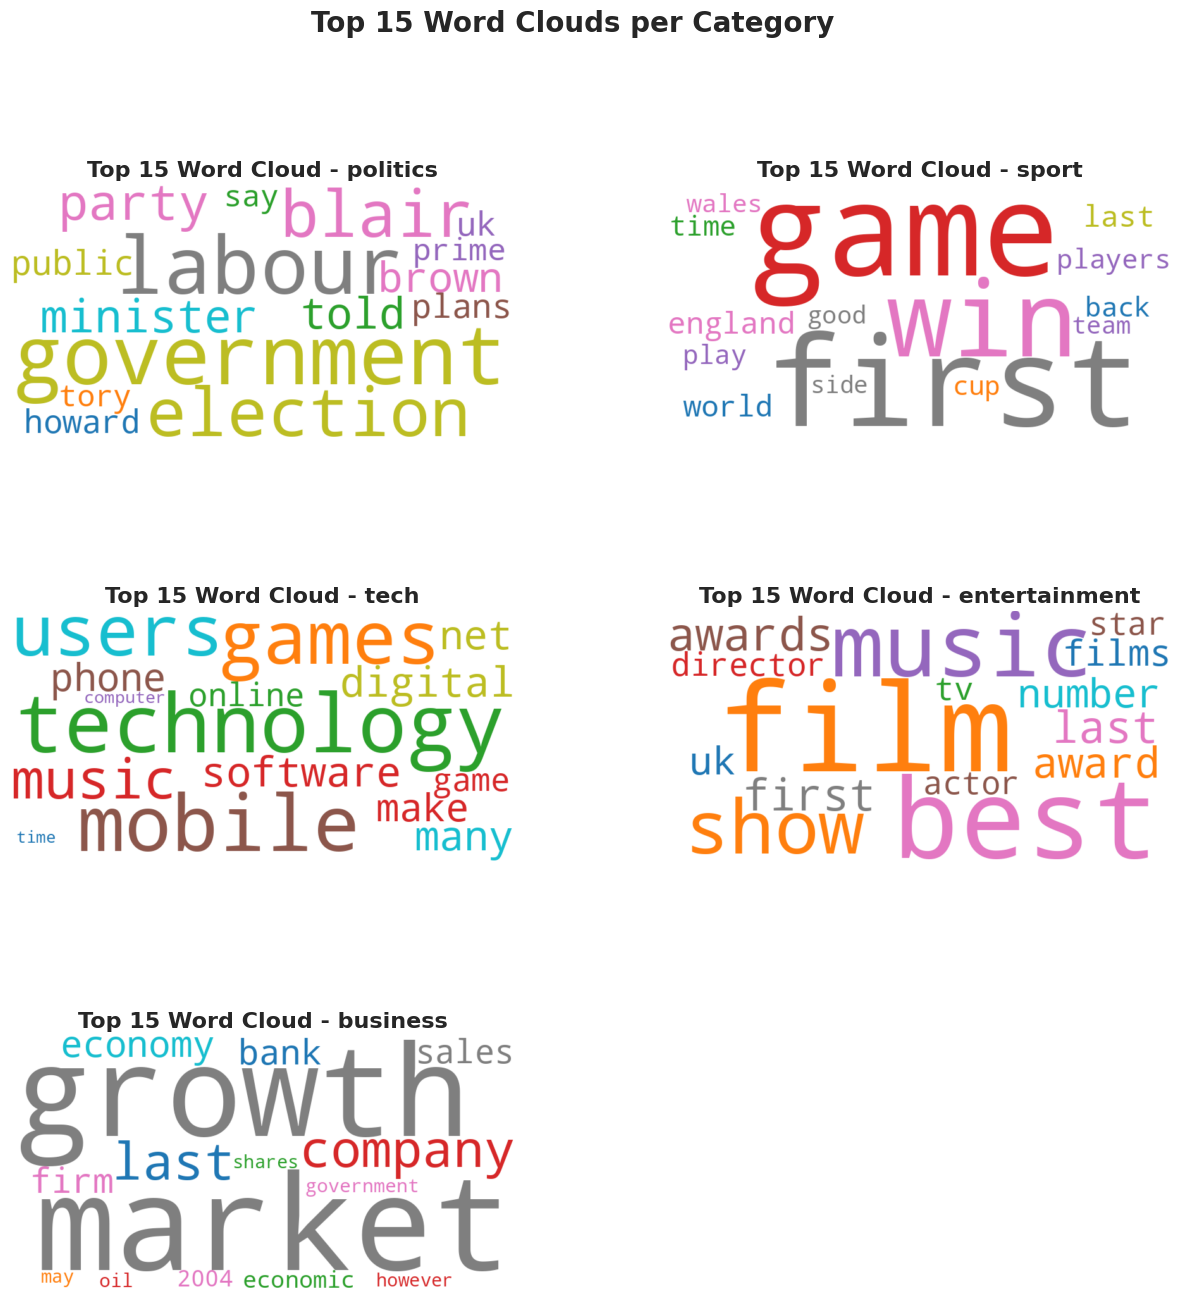

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

categories = df['category'].unique()
n_categories = len(categories)

fig = plt.figure(figsize=(15, 5 * ((n_categories + 1) // 2)))
gs = gridspec.GridSpec((n_categories + 1) // 2, 2, figure=fig, wspace=0.3, hspace=0.4)

for i, cat in enumerate(categories):
    subset = df[df['category'] == cat]
    text = ' '.join(subset['cleaned_text'].dropna())

    tokens = [word for word in text.split() if word.lower() not in custom_stopwords]
    top_words = dict(Counter(tokens).most_common(15))

    wc = WordCloud(width=800,
                   height=400,
                   background_color='white',
                   max_words=15,
                   relative_scaling=0.5,
                   normalize_plurals=True,
                   prefer_horizontal=1.0,
                   colormap='tab10').generate_from_frequencies(top_words)

    ax = fig.add_subplot(gs[i // 2, i % 2])
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f"Top 15 Word Cloud - {cat}", fontsize=16, weight='bold')

plt.suptitle("Top 15 Word Clouds per Category", fontsize=20, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#TF-IDF-Based Top 15 Words Per Topic (How distinctive the top word)

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

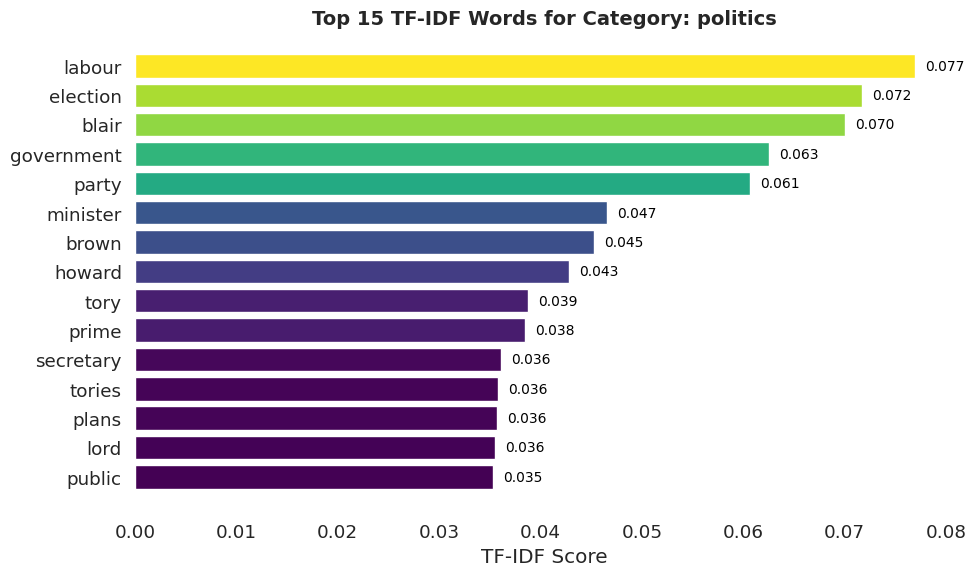

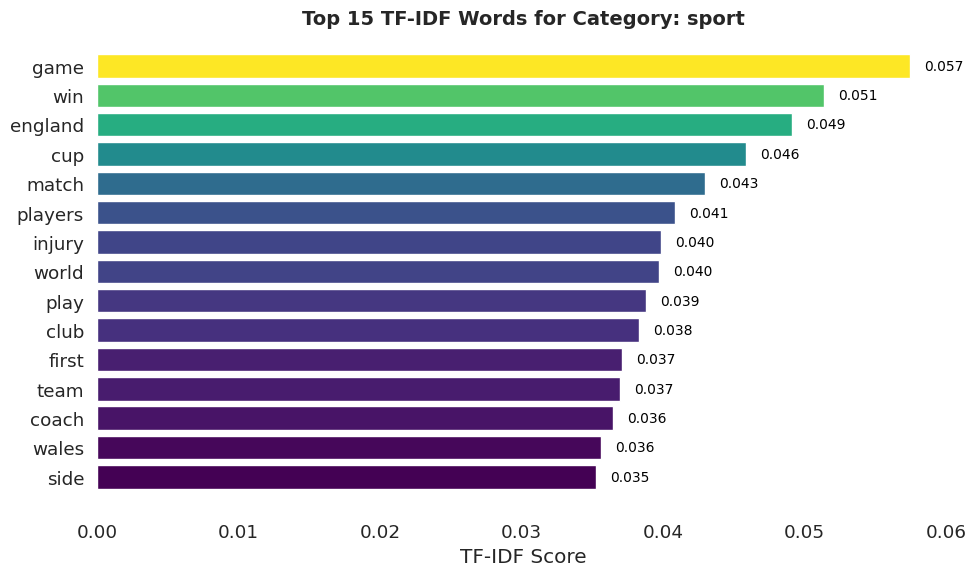

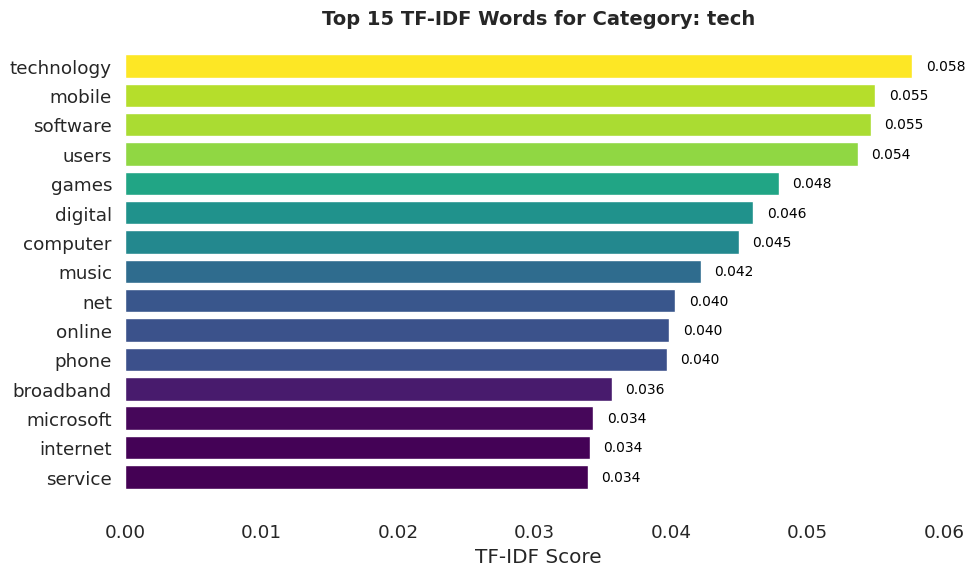

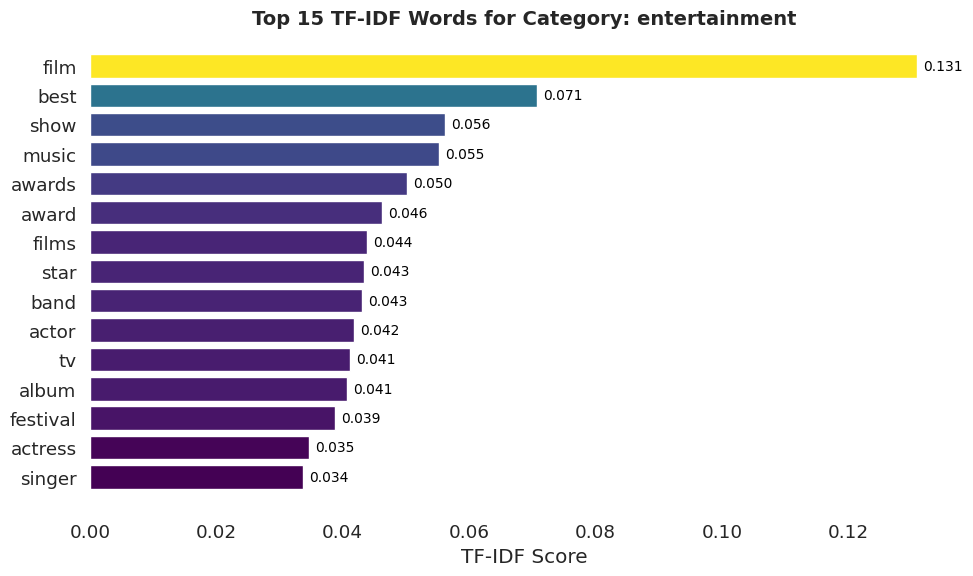

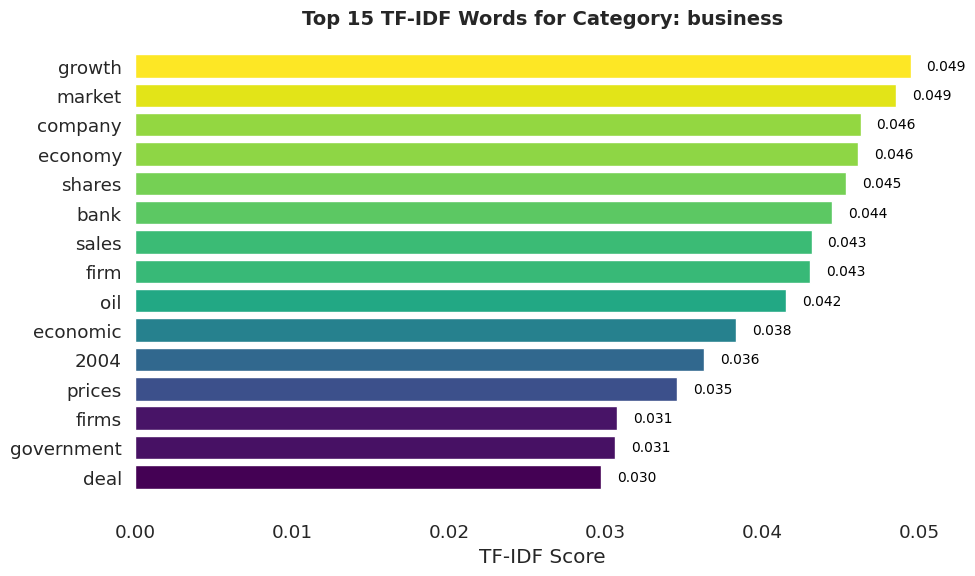

In [ ]:
sns.set(style='white', font_scale=1.2)

vectorizer = TfidfVectorizer(stop_words=list(custom_stopwords), max_features=1000)
X_tfidf = vectorizer.fit_transform(df['cleaned_text'])
features = vectorizer.get_feature_names_out()


categories = df['category'].unique()

for cat in categories:
    cat_indices = df[df['category'] == cat].index
    cat_tfidf = X_tfidf[cat_indices].mean(axis=0).A1
    top_indices = np.argsort(cat_tfidf)[-15:][::-1]
    top_words = [features[i] for i in top_indices]
    top_scores = [cat_tfidf[i] for i in top_indices]

    plot_df = pd.DataFrame({'word': top_words, 'tfidf': top_scores})
    plot_df.sort_values(by='tfidf', ascending=True, inplace=True)


    norm = plt.Normalize(plot_df['tfidf'].min(), plot_df['tfidf'].max())
    colors = plt.cm.viridis(norm(plot_df['tfidf']))


    plt.figure(figsize=(10, 6))
    bars = plt.barh(plot_df['word'], plot_df['tfidf'], color=colors)
    plt.xlabel('TF-IDF Score')
    plt.title(f'Top 15 TF-IDF Words for Category: {cat}', fontsize=14, weight='bold')


    plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
    plt.gca().set_facecolor('white')

    plt.grid(False)

    for i, v in enumerate(plot_df['tfidf']):
        plt.text(v + 0.001, i, f'{v:.3f}', va='center', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()
